In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("ma_lga_12345.csv")

In [4]:
df.head(5)

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


In [5]:
df.tail(5)

,saledate,MA,type,bedrooms
342,30/09/2018,603281,unit,3
343,31/12/2018,601167,unit,3
344,31/03/2019,605637,unit,3
345,30/06/2019,599339,unit,3
346,30/09/2019,597884,unit,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   saledate  347 non-null    object
 1   MA        347 non-null    int64 
 2   type      347 non-null    object
 3   bedrooms  347 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


In [12]:
df2 = df.copy()

In [13]:
df2['saledate'] = pd.to_datetime(df2['saledate'],dayfirst=True)

In [14]:
df2

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2
...,...,...,...,...
342,2018-09-30,603281,unit,3
343,2018-12-31,601167,unit,3
344,2019-03-31,605637,unit,3
345,2019-06-30,599339,unit,3


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   saledate  347 non-null    datetime64[ns]
 1   MA        347 non-null    int64         
 2   type      347 non-null    object        
 3   bedrooms  347 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.0+ KB


In [20]:
year_n = int(input("Please enter the year: "))
include = df2[df2['saledate'].dt.year == year_n]
include

Please enter the year:  2007


,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
49,2007-03-31,421291,house,3
50,2007-06-30,421291,house,3
51,2007-09-30,421291,house,3
52,2007-12-31,421291,house,3
100,2007-03-31,548969,house,4
101,2007-06-30,548969,house,4
102,2007-09-30,548969,house,4
103,2007-12-31,548969,house,4


In [29]:
df3=df2.groupby(df2['saledate'].dt.year).mean(numeric_only = True)
df3

,MA,bedrooms
saledate,,
2007,483716.944444,3.055556
2008,484930.142857,2.857143
2009,495247.607143,2.857143
2010,513004.428571,2.857143
2011,526968.571429,2.857143
2012,531474.714286,2.857143
2013,536824.500000,2.857143
2014,548960.357143,2.857143
2015,567601.500000,2.857143


In [27]:
import matplotlib.pyplot as plt

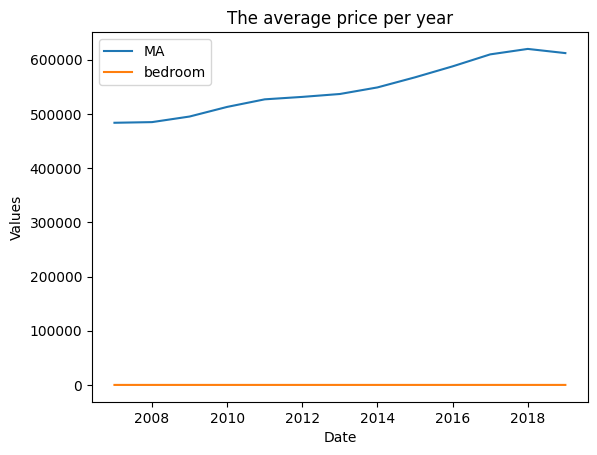

In [39]:
plt.title("The average price per year")
plt.plot(df2.groupby(df2['saledate'].dt.year).mean(numeric_only = True))
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['MA','bedroom'],loc = 'upper left')
plt.show()

In [41]:
df2['saledate'].groupby(df2['saledate'].dt.year).count()

saledate
2007    18
2008    28
2009    28
2010    28
2011    28
2012    28
2013    28
2014    28
2015    28
2016    28
2017    28
2018    28
2019    21
Name: saledate, dtype: int64

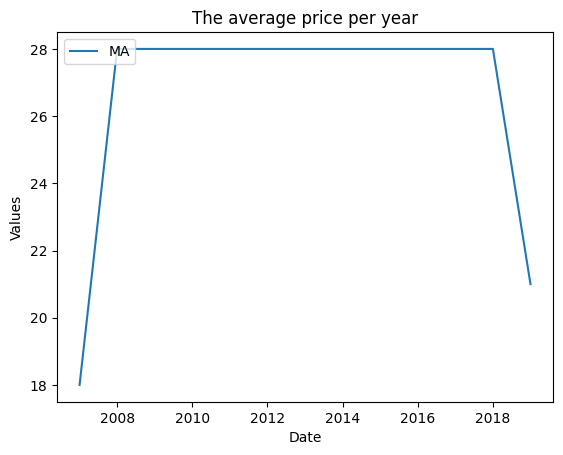

In [42]:
plt.title("The average price per year")
plt.plot(df2['saledate'].groupby(df2['saledate'].dt.year).count())
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['MA','bedroom'],loc = 'upper left')
plt.show()

In [68]:
filtered_df = df2[df2['saledate'].dt.strftime('%Y-%m-%d').between('2010-08-01', '2015-12-31')]

In [69]:
filtered_df

,saledate,MA,type,bedrooms
12,2010-09-30,457806,house,2
13,2010-12-31,459109,house,2
14,2011-03-31,460758,house,2
15,2011-06-30,464788,house,2
16,2011-09-30,467546,house,2
...,...,...,...,...
327,2014-12-31,598812,unit,3
328,2015-03-31,599507,unit,3
329,2015-06-30,602877,unit,3
330,2015-09-30,603343,unit,3


In [70]:
df2['MA'].groupby(df2['saledate'].dt.month).mean(numeric_only = True)

saledate
3     547347.232558
6     547992.517241
9     550926.522222
12    546085.702381
Name: MA, dtype: float64

In [88]:
plt.title("The average price per year")
plt.hist(df2['bedrooms'].groupby(df2['saledate'].dt.year)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['MA','bedroom'],loc = 'upper left')
plt.show()

SyntaxError: '(' was never closed (1166067453.py, line 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


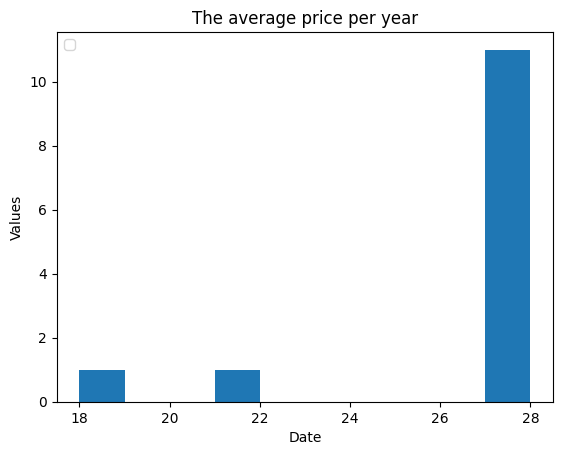

In [93]:
plt.title("The average price per year")
plt.hist(df2['bedrooms'].groupby(df2['saledate'].dt.year).count())
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc = 'upper left')
plt.show()

In [95]:
df3 = df2['bedrooms'].groupby(df2['saledate'].dt.year).count()

In [102]:
df3

saledate
2007    18
2008    28
2009    28
2010    28
2011    28
2012    28
2013    28
2014    28
2015    28
2016    28
2017    28
2018    28
2019    21
Name: bedrooms, dtype: int64

In [105]:
df3.index

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='saledate')

In [125]:
plt.bar(df3.values)

TypeError: bar() missing 1 required positional argument: 'height'

In [114]:
df3.index

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='saledate')

In [120]:
df3.values

array([18, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 21], dtype=int64)

ValueError: `bins` must increase monotonically, when an array

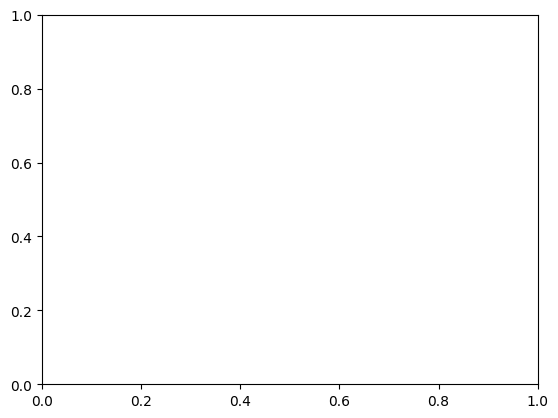

In [123]:
plt.hist(df3.index,df3.values)